In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import intake,yaml
import intake_esm
from scipy import special
import keras
from keras.models import Model
from keras.layers import Dense, Input

In [2]:
def latest_version(cat):
    """
    input
    cat: esmdatastore
    output
    esmdatastore with latest DRS versions
    """
    latest_cat = cat.df.sort_values(by=['version','path']).drop_duplicates(['temporal_subset','source_id','table_id',
                                               'institution_id','variable_id','member_id',
                                               'grid_label','experiment_id'],keep='last')
    return latest_cat

In [3]:
#col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
col_url = "https://raw.githubusercontent.com/aradhakrishnanGFDL/gfdl-aws-analysis/master/esm-collection-spec-examples/esgf-world.json"
col = intake.open_esm_datastore(col_url)
esmcol_data = col.esmcol_data

In [4]:
model_name = 'UKESM1-0-LL'

In [5]:
#mlotst, tos,uo,vo

In [6]:
#tos_ sea surface temperature
#area cello
#ofx ocean fixed
#omon  ocean monthly average 

In [7]:

query_Omon_tos = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 table_id=['Omon'],
                 member_id=["r1i1p1f1","r1i1p1f2"],
                 source_id=model_name,
                 grid_label=['gn'],
                 variable_id=["tos"])
query_Ofx = dict(#experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 table_id=['Ofx'],
               #member_id=["r1i1p1f1","r1i1p1f2"],
                 source_id=model_name,
                 grid_label=['gn'],
                 variable_id=["areacello"])

In [8]:
def pp_enso(ds):
    ds = ds.copy()   #the wrapper function makes a copy of the ds and works from this
    #ds = rename_cmip6(ds)
    ds = fix_time(ds)
    #ds = fix_units(ds)
    #ds = correct_units(ds)
    return ds

In [9]:
cat_Omon_tos = col.search(**query_Omon_tos)
cat_Omon_tos_lat = latest_version(cat_Omon_tos)

cat_Omon_tos_latest = intake.open_esm_datastore(cat_Omon_tos_lat,esmcol_data=esmcol_data)

In [10]:
cat_Omon_tos_latest.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
10,CMIP6,MOHC,UKESM1-0-LL,historical,mon,ocean,Omon,r1i1p1f2,gn,tos,185001-194912,v20190627,s3://esgf-world/CMIP6/CMIP/MOHC/UKESM1-0-LL/hi...
11,CMIP6,MOHC,UKESM1-0-LL,historical,mon,ocean,Omon,r1i1p1f2,gn,tos,195001-201412,v20190627,s3://esgf-world/CMIP6/CMIP/MOHC/UKESM1-0-LL/hi...
2,CMIP6,MOHC,UKESM1-0-LL,1pctCO2,mon,ocean,Omon,r1i1p1f2,gn,tos,185001-194912,v20190701,s3://esgf-world/CMIP6/CMIP/MOHC/UKESM1-0-LL/1p...
3,CMIP6,MOHC,UKESM1-0-LL,1pctCO2,mon,ocean,Omon,r1i1p1f2,gn,tos,195001-199912,v20190701,s3://esgf-world/CMIP6/CMIP/MOHC/UKESM1-0-LL/1p...
6,CMIP6,MOHC,UKESM1-0-LL,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f2,gn,tos,185001-194912,v20190701,s3://esgf-world/CMIP6/CMIP/MOHC/UKESM1-0-LL/ab...
7,CMIP6,MOHC,UKESM1-0-LL,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f2,gn,tos,195001-199912,v20190701,s3://esgf-world/CMIP6/CMIP/MOHC/UKESM1-0-LL/ab...


In [11]:
cat_Ofx = col.search(**query_Ofx)
cat_Ofx_lat = latest_version(cat_Ofx)

cat_Ofx_latest = intake.open_esm_datastore(cat_Ofx_lat,esmcol_data=esmcol_data)

In [12]:
cat_Ofx.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
0,CMIP6,MOHC,UKESM1-0-LL,piControl,NaN,NaN,Ofx,r1i1p1f2,gn,areacello,NaN,v20190705,s3://esgf-world/CMIP6/CMIP/MOHC/UKESM1-0-LL/pi...


In [13]:
dict_Omon_tos = cat_Omon_tos_latest.to_dataset_dict(storage_options=dict(anon=True), cdf_kwargs={'decode_times': True,'chunks': {'time': 1}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


In [14]:
dict_Ofx = cat_Ofx_latest.to_dataset_dict(storage_options=dict(anon=True),cdf_kwargs={'decode_times': True,'chunks': {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


In [15]:
dict_Omon_tos.keys()

dict_keys(['CMIP6.MOHC.UKESM1-0-LL.historical.Omon', 'CMIP6.MOHC.UKESM1-0-LL.1pctCO2.Omon', 'CMIP6.MOHC.UKESM1-0-LL.abrupt-4xCO2.Omon'])

In [16]:
dict_Ofx.keys()

dict_keys(['CMIP6.MOHC.UKESM1-0-LL.piControl.Ofx'])

In [17]:
ds_Ofx = dict_Ofx["CMIP6.MOHC.UKESM1-0-LL.piControl.Ofx"] #xarray dataset object to access Ofx areacello dataset used to calculate the weighted average

CALCULATING the summation of areacello

In [18]:
def distance_on_unit_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = np.pi / 180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    # theta = longitude
    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians
    # Compute spherical distance from spherical coordinates.
    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta, phi)
    # cosine( arc length ) =
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
    cos = np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) + np.cos(phi1) * np.cos(
        phi2
    )
    arc = np.arccos(cos)
    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc

In [19]:
def find_closest_grid_point(lon, lat, gridlon, gridlat):
    """find integer indices of closest grid point in grid of coordinates
    gridlon, gridlat for a given geographical lon/lat.
    PARAMETERS:
    -----------
        lon (float): longitude of point to find
        lat (float): latitude of point to find
        gridlon (numpy.ndarray): grid longitudes
        gridlat (numpy.ndarray): grid latitudes
    RETURNS:
    --------
    iclose, jclose: integer
        grid indices for geographical point of interest
    """

    if isinstance(gridlon, xr.core.dataarray.DataArray):
        gridlon = gridlon.values
    if isinstance(gridlat, xr.core.dataarray.DataArray):
        gridlat = gridlat.values
    dist = distance_on_unit_sphere(lat, lon, gridlat, gridlon)
    jclose, iclose = np.unravel_index(dist.argmin(), gridlon.shape)
    return iclose, jclose


In [20]:
i,j= find_closest_grid_point(-157, -5, ds_Ofx.longitude, ds_Ofx.latitude)#for southwest
i,j

(129, 170)

In [21]:
k,l = find_closest_grid_point(-90, 5, ds_Ofx.longitude, ds_Ofx.latitude)#for northwest
k,l

(196, 200)

In [22]:
ds_Ofx.dims

Frozen(SortedKeysDict({'j': 330, 'i': 360, 'vertices': 4, 'member_id': 1}))

In [23]:
#TODO INSERT CELL SELECT region of interest in areacello
areacello_nino3 = ds_Ofx.areacello.sel(j = slice(j,l), i = slice(i,k))


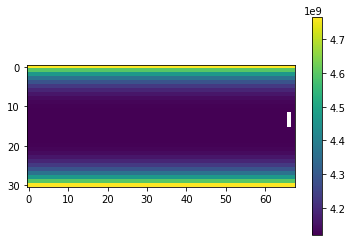

In [24]:
plt.imshow(areacello_nino3[0])
plt.colorbar()

In [25]:
#TODO 
#CALCULATE total_areacello, summation across lat,lon (in our dataset y,x respectively)

total_areacello = areacello_nino3.sum(dim=('i', 'j'))


NINO3 INDEX CALCULATION 

REGION 

(5S-5N , 150W-90W) 

SELECT tos and areacello for the region of interest

## Historical

In [26]:
ds_hist = dict_Omon_tos["CMIP6.MOHC.UKESM1-0-LL.historical.Omon"]


In [30]:
ds_hist.dims

Frozen(SortedKeysDict({'time': 1980, 'bnds': 2, 'j': 330, 'i': 360, 'vertices': 4, 'member_id': 1}))

In [28]:
tm_his_st, tm_his_nd = '1980','2011'

In [94]:
#ds_hist.time.to_dataframe()

In [31]:
tos_his = ds_hist.tos.sel(j = slice(j,l), i = slice(i,k), time = slice(tm_his_st, tm_his_nd))
tos_his

<xarray.DataArray 'tos' (member_id: 1, time: 384, j: 31, i: 68)>
dask.array<getitem, shape=(1, 384, 31, 68), dtype=float32, chunksize=(1, 1, 31, 68), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1980-01-16 00:00:00 ... 2011-12-16 00:00:00
  * j          (j) int32 170 171 172 173 174 175 176 ... 195 196 197 198 199 200
  * i          (i) int32 129 130 131 132 133 134 135 ... 191 192 193 194 195 196
    latitude   (j, i) float32 dask.array<chunksize=(31, 68), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(31, 68), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f2'
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  mo: (variable_name: tos)
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello

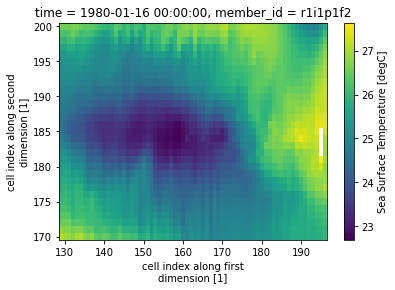

In [32]:
tos_his.isel(time=0).plot()


CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [33]:
tos_mean_nino3_his = (tos_his * areacello_nino3).sum(dim=('i', 'j')) / total_areacello
#nino3_index.plot()

In [34]:
tos_mean_nino3_his = tos_mean_nino3_his.compute()
tos_mean_nino3_his

In [36]:
tos_mean_nino3_his.size #1980 values, 1 value per month , 12 per year for 165 years

384

In [37]:
tos_mean_nino3_his.isel(time=0).compute()

<xarray.DataArray (member_id: 1)>
array([25.223063], dtype=float32)
Coordinates:
    time       object 1980-01-16 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f2'

In [38]:
datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()
tos_mean_nino3_his['time'] = datetimeindex


<ipython-input-38-e7b25880c2d7>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()


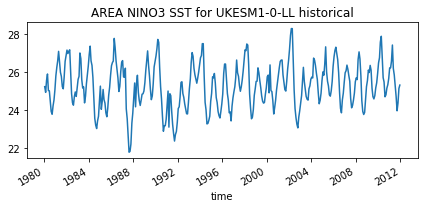

In [40]:
tos_mean_nino3_his.sel(time=slice(tm_his_st, tm_his_nd)).plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_SST_Hist_{tm_his_st}_{tm_his_nd}.png")

ADDITIONAL EXPLORATION

CLIMATOLOGY (average all Jans, Febs, etc) CALC EXAMPLES (YEARS NEED A TWEAK, calculate for 20 year chunks or as needed)

In [41]:
tos_nino3_climatology = tos_mean_nino3_his.groupby('time.month').mean(dim='time')


In [43]:
tos_nino3_climatology = tos_nino3_climatology.compute()

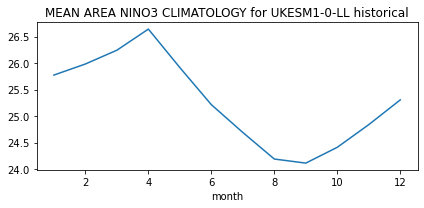

In [44]:
#tos_nino3_climatology.isel(month=0).plot()
tos_nino3_climatology.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_Clima_Hist_{tm_his_st}_{tm_his_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [53]:
#tos_sel = tos_his.sel(time=slice('1980','2011'))
index_nino3 = (tos_his.groupby('time.month')-tos_nino3_climatology).mean(dim=['i','j'])

In [54]:
index_nino3 = index_nino3.compute()

<ipython-input-55-087b1f4cccc9>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = index_nino3.indexes['time'].to_datetimeindex()


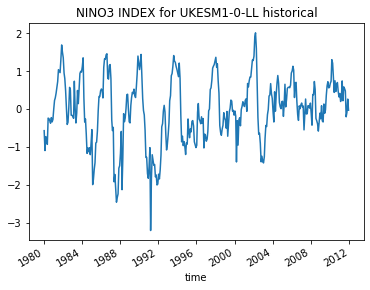

In [55]:
datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
index_nino3['time'] = datetimeindex
index_nino3.plot()
plt.title(f"NINO3 INDEX for {model_name} historical")
plt.savefig(f"{model_name}_Nino3Idx_Hist_{tm_his_st}_{tm_his_nd}.png")

## 1%CO2

In [62]:
ds_1pct = dict_Omon_tos["CMIP6.MOHC.UKESM1-0-LL.1pctCO2.Omon"]

In [63]:
ds_1pct.time.to_dataframe()

,time
time,
1850-01-16 00:00:00,1850-01-16 00:00:00
1850-02-16 00:00:00,1850-02-16 00:00:00
1850-03-16 00:00:00,1850-03-16 00:00:00
1850-04-16 00:00:00,1850-04-16 00:00:00
1850-05-16 00:00:00,1850-05-16 00:00:00
...,...
1999-08-16 00:00:00,1999-08-16 00:00:00
1999-09-16 00:00:00,1999-09-16 00:00:00
1999-10-16 00:00:00,1999-10-16 00:00:00


In [64]:
tm_1pct_st, tm_1pct_nd = "1967", "1998"


In [20]:
#tos_1pct = ds_1pct.tos#.sel(time = slice("1980", "2011"))

In [65]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 

tos_1pct = ds_1pct.tos.sel(j = slice(j,l), i = slice(i,k), time = slice(tm_1pct_st, tm_1pct_nd))
tos_1pct

<xarray.DataArray 'tos' (member_id: 1, time: 384, j: 31, i: 68)>
dask.array<getitem, shape=(1, 384, 31, 68), dtype=float32, chunksize=(1, 1, 31, 68), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1967-01-16 00:00:00 ... 1998-12-16 00:00:00
  * j          (j) int32 170 171 172 173 174 175 176 ... 195 196 197 198 199 200
  * i          (i) int32 129 130 131 132 133 134 135 ... 191 192 193 194 195 196
    latitude   (j, i) float32 dask.array<chunksize=(31, 68), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(31, 68), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f2'
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  mo: (variable_name: tos)
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello

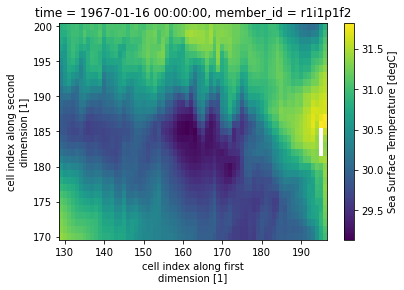

In [66]:
tos_1pct.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [68]:
tos_mean_nino3_1pct = (tos_1pct * areacello_nino3).sum(dim=('i', 'j')) / total_areacello
#nino3_index.plot()

In [69]:
tos_mean_nino3_1pct = tos_mean_nino3_1pct.compute()

In [70]:
tos_mean_nino3_1pct

<xarray.DataArray (member_id: 1, time: 384)>
array([[30.398258, 30.551712, 31.243597, 31.514324, 30.998552, 30.348047,
        29.613518, 28.70516 , 28.517233, 28.497824, 28.605696, 29.21556 ,
        29.479628, 30.268187, 30.569143, 30.644001, 30.263565, 29.794802,
        28.991714, 28.148045, 27.706148, 27.279598, 28.153368, 28.91523 ,
        29.424952, 29.472351, 30.545517, 30.66838 , 29.510666, 28.627562,
        28.147451, 27.674925, 27.775684, 28.174595, 28.668442, 29.14094 ,
        29.552649, 30.179615, 30.330364, 30.588398, 29.512253, 28.372074,
        28.038054, 26.389061, 25.905344, 26.410692, 27.352924, 28.210495,
        29.277294, 29.234236, 29.634802, 30.312208, 30.091246, 29.627836,
        29.017923, 28.445292, 28.126223, 28.707857, 28.995354, 29.732006,
        30.230225, 30.404638, 30.974724, 31.205221, 30.732311, 30.430126,
        29.664541, 29.281244, 29.171898, 28.755669, 29.220478, 30.0069  ,
        30.533306, 30.872292, 31.607744, 31.560314, 30.732498, 29.894318,
        29.277645, 28.465532, 28.118338, 28.351868, 29.264936, 29.845325,
        30.376106, 29.937948, 30.642914, 30.430471, 30.041662, 29.401981,
        29.115282, 28.00371 , 27.84384 , 28.49972 , 29.199894, 29.942919,
        30.414127, 30.72168 , 30.849758, 31.225937, 30.09023 , 28.727243,
        28.071642, 27.39513 , 27.226067, 27.691467, 28.561344, 29.004324,
        29.61049 , 30.288544, 30.757177, 30.996836, 30.745441, 29.565708,
        28.999666, 27.888407, 28.250126, 28.787302, 29.510794, 30.087978,
...
        28.620745, 28.338215, 28.331972, 28.73278 , 29.345314, 30.113325,
        30.669067, 31.313297, 31.556932, 32.06434 , 31.167316, 30.17348 ,
        30.123787, 30.099182, 29.392208, 29.399548, 29.682295, 30.30415 ,
        31.098812, 31.536268, 31.470573, 32.27238 , 31.11734 , 30.413973,
        30.162928, 29.652866, 29.44338 , 28.94287 , 29.356714, 29.904135,
        30.480507, 30.926231, 30.48084 , 31.77722 , 31.084257, 30.748274,
        30.097486, 29.703682, 29.813017, 29.989862, 30.397675, 30.965538,
        31.639006, 31.997385, 32.35422 , 32.939247, 32.419003, 31.761389,
        30.937021, 29.608873, 28.971212, 28.958935, 29.427626, 30.200346,
        30.984138, 31.643417, 31.899923, 31.96301 , 31.073088, 30.287186,
        29.054073, 28.126245, 28.405077, 28.039022, 29.33136 , 29.974007,
        30.561052, 30.73865 , 31.207355, 31.489372, 30.853323, 30.135536,
        29.426495, 28.810127, 28.039206, 27.971647, 28.83186 , 29.385775,
        30.631145, 30.506195, 30.619387, 31.432903, 30.803007, 30.392733,
        29.964302, 29.06998 , 29.088964, 29.076218, 29.29796 , 29.877146,
        30.630548, 31.538708, 32.123173, 32.565292, 32.119713, 31.153675,
        30.699335, 30.364172, 30.289068, 30.439339, 31.04587 , 31.507166,
        32.166027, 32.606068, 33.122612, 33.219345, 32.730915, 32.08971 ,
        31.026176, 29.900476, 30.016983, 29.707714, 29.861393, 30.7091  ]],
      dtype=float32)
Coordinates:
  * time       (time) object 1967-01-16 00:00:00 ... 1998-12-16 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f2'

In [71]:
tos_mean_nino3_1pct.size

384

In [72]:
tos_mean_nino3_1pct.isel(time=0).compute()

<xarray.DataArray (member_id: 1)>
array([30.398258], dtype=float32)
Coordinates:
    time       object 1967-01-16 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f2'

In [73]:
datetimeindex_1pct = tos_mean_nino3_1pct.indexes['time'].to_datetimeindex()

<ipython-input-73-3e144c86bf9d>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex_1pct = tos_mean_nino3_1pct.indexes['time'].to_datetimeindex()


In [74]:
tos_mean_nino3_1pct['time'] = datetimeindex_1pct

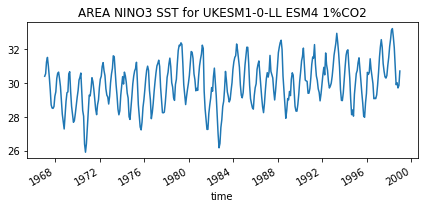

In [75]:
tos_mean_nino3_1pct.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} ESM4 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCo2_SST_{tm_1pct_st}_{tm_1pct_nd}.png")

In [76]:
tos_nino3_climatology_1pct = tos_mean_nino3_1pct.groupby('time.month').mean(dim='time')


In [77]:
tos_nino3_climatology_1pct = tos_nino3_climatology_1pct.compute()

In [78]:
print(tos_nino3_climatology_1pct)

<xarray.DataArray (member_id: 1, month: 12)>
array([[30.481495, 30.801138, 31.207623, 31.562204, 30.885563, 30.06733 ,
        29.443775, 28.717363, 28.482635, 28.681599, 29.277863, 29.892834]],
      dtype=float32)
Coordinates:
  * member_id  (member_id) <U8 'r1i1p1f2'
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


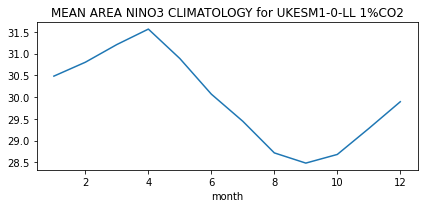

In [79]:
tos_nino3_climatology_1pct.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCO2_Clima_{tm_1pct_st}_{tm_1pct_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [81]:
#tos_sel = tos_1pct.sel(time=slice('0119','0150'))
index_nino3 = (tos_1pct.groupby('time.month')-tos_nino3_climatology_1pct).mean(dim=['i','j'])

In [82]:
index_nino3 = index_nino3.compute()

<ipython-input-83-86991b4a51c2>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = index_nino3.indexes['time'].to_datetimeindex()


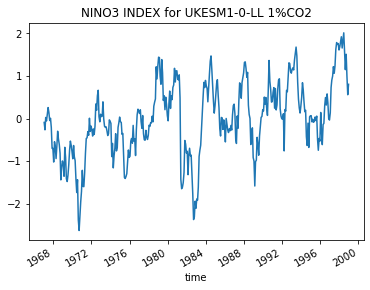

In [83]:
datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
index_nino3['time'] = datetimeindex
index_nino3.plot()
plt.title(f"NINO3 INDEX for {model_name} 1%CO2")
plt.savefig(f"{model_name}_1pctCO2_Nino3Idx_{tm_1pct_st}_{tm_1pct_nd}.png")

## Abrupt-4xCO2

In [84]:
ds_4x = dict_Omon_tos["CMIP6.MOHC.UKESM1-0-LL.abrupt-4xCO2.Omon"]

In [85]:
ds_4x.time.to_dataframe()

,time
time,
1850-01-16 00:00:00,1850-01-16 00:00:00
1850-02-16 00:00:00,1850-02-16 00:00:00
1850-03-16 00:00:00,1850-03-16 00:00:00
1850-04-16 00:00:00,1850-04-16 00:00:00
1850-05-16 00:00:00,1850-05-16 00:00:00
...,...
1999-08-16 00:00:00,1999-08-16 00:00:00
1999-09-16 00:00:00,1999-09-16 00:00:00
1999-10-16 00:00:00,1999-10-16 00:00:00


In [89]:
tm_4x_st,tm_4x_nd = "1967", "1998"

In [90]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
tos_4x = ds_4x.tos.sel(j = slice(j,l), i= slice(i,k), time = slice(tm_4x_st,tm_4x_nd) )
tos_4x

<xarray.DataArray 'tos' (member_id: 1, time: 384, j: 31, i: 68)>
dask.array<getitem, shape=(1, 384, 31, 68), dtype=float32, chunksize=(1, 1, 31, 68), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1967-01-16 00:00:00 ... 1998-12-16 00:00:00
  * j          (j) int32 170 171 172 173 174 175 176 ... 195 196 197 198 199 200
  * i          (i) int32 129 130 131 132 133 134 135 ... 191 192 193 194 195 196
    latitude   (j, i) float32 dask.array<chunksize=(31, 68), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(31, 68), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f2'
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  mo: (variable_name: tos)
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello

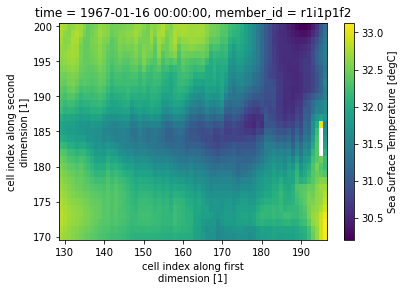

In [91]:
tos_4x.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [92]:
tos_mean_nino3_4x = (tos_4x * areacello_nino3).sum(dim=('i', 'j')) / total_areacello
#nino3_index.plot()

In [93]:
tos_mean_nino3_4x = tos_mean_nino3_4x.compute()
tos_mean_nino3_4x

<xarray.DataArray (member_id: 1, time: 384)>
array([[31.823122, 31.861807, 32.48248 , 33.313778, 33.21164 , 32.92208 ,
        32.455353, 32.15296 , 31.653566, 31.693583, 32.028656, 32.71345 ,
        33.100735, 33.529667, 33.82005 , 33.72716 , 32.860767, 31.84235 ,
        30.779007, 30.256376, 30.087908, 29.982012, 30.453085, 30.848932,
        31.085537, 30.792297, 31.361425, 32.063194, 31.225374, 30.23024 ,
        29.500422, 29.13453 , 29.10357 , 29.614017, 30.385357, 31.152954,
        31.775078, 31.91938 , 32.200596, 32.676186, 32.59207 , 32.06203 ,
        31.394674, 30.61492 , 30.303663, 30.237373, 30.936857, 31.50312 ,
        32.248974, 32.61159 , 32.54286 , 33.094013, 32.413418, 30.950888,
        29.824087, 29.106573, 28.706438, 29.159138, 29.463503, 30.155636,
        31.161705, 30.736145, 31.140635, 32.202663, 31.68831 , 30.983105,
        30.669094, 30.30528 , 30.389597, 30.761105, 30.9413  , 31.872206,
        32.244743, 32.184772, 32.508057, 33.15425 , 32.78815 , 31.938417,
        31.170906, 30.773596, 30.478786, 30.630335, 30.9442  , 31.739056,
        32.1317  , 32.10611 , 32.45022 , 33.18813 , 33.1107  , 32.91979 ,
        32.6081  , 31.817072, 30.928196, 30.777708, 31.314459, 31.949383,
        32.0353  , 31.977688, 32.69715 , 32.96652 , 32.488655, 31.291605,
        30.262135, 29.524439, 29.712736, 30.171364, 30.79738 , 31.301664,
        31.987986, 31.88208 , 31.924063, 32.671597, 32.551384, 31.464895,
        31.03806 , 30.514833, 30.456076, 30.458946, 31.17023 , 31.941921,
...
        31.906168, 31.673716, 31.181904, 31.34079 , 31.471046, 32.120743,
        32.193386, 31.268888, 31.197998, 32.240772, 31.67793 , 30.978497,
        30.29003 , 30.128609, 30.131845, 30.401606, 31.011562, 31.913944,
        32.311058, 32.073612, 31.92567 , 32.675278, 33.231667, 32.661316,
        32.362125, 31.779303, 31.550964, 31.531538, 32.087894, 32.570904,
        33.11375 , 33.32304 , 33.53106 , 33.87492 , 33.68539 , 33.213005,
        31.832767, 31.06307 , 30.753834, 30.303389, 30.900217, 31.64311 ,
        32.287197, 32.17115 , 32.169262, 32.559994, 33.01487 , 31.576288,
        31.043493, 30.785114, 30.002638, 30.374062, 31.277876, 31.787054,
        32.20622 , 32.420746, 32.78177 , 33.219994, 33.067604, 32.293438,
        31.088781, 29.644096, 29.590738, 30.316366, 30.52744 , 31.424397,
        31.782003, 31.410501, 31.756153, 32.15822 , 31.017523, 29.618336,
        29.402412, 29.315187, 29.1043  , 29.631392, 30.77368 , 31.47862 ,
        32.008205, 32.040806, 32.300964, 32.8854  , 32.865734, 31.963682,
        31.51751 , 31.167055, 30.787443, 30.820229, 31.194506, 31.978632,
        32.50333 , 32.818977, 33.036674, 33.08213 , 32.85159 , 32.047577,
        31.61001 , 31.003075, 30.82862 , 31.148165, 31.53834 , 32.197357,
        32.590153, 32.203815, 32.73076 , 33.122337, 32.72598 , 31.612835,
        31.018105, 30.180891, 29.76225 , 30.071577, 31.010015, 31.623522]],
      dtype=float32)
Coordinates:
  * time       (time) object 1967-01-16 00:00:00 ... 1998-12-16 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f2'

In [94]:
tos_mean_nino3_4x.size #1980 values, 1 value per month , 12 per year for 165 years

384

In [95]:
tos_mean_nino3_4x.isel(time=0).compute()

<xarray.DataArray (member_id: 1)>
array([31.823122], dtype=float32)
Coordinates:
    time       object 1967-01-16 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f2'

In [ ]:
datetimeindex_4x = tos_mean_nino3_4x.indexes['time'].to_datetimeindex()
tos_mean_nino3_4x['time'] = datetimeindex_4x


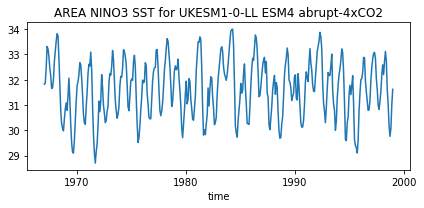

In [96]:
tos_mean_nino3_4x.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} ESM4 abrupt-4xCO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_4xCo2_SST_{tm_4x_st}_{tm_4x_nd}.png")

In [98]:
tos_nino3_climatology_4x = tos_mean_nino3_4x.groupby('time.month').mean(dim='time')


In [99]:
tos_nino3_climatology_4x = tos_nino3_climatology_4x.compute()

In [101]:
print(tos_nino3_climatology_4x)

<xarray.DataArray (member_id: 1, month: 12)>
array([[32.229607, 32.220535, 32.430283, 32.893364, 32.68001 , 31.83482 ,
        31.1717  , 30.582378, 30.329159, 30.553257, 31.071848, 31.73964 ]],
      dtype=float32)
Coordinates:
  * member_id  (member_id) <U8 'r1i1p1f2'
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


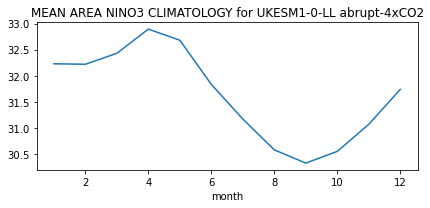

In [102]:
tos_nino3_climatology_4x.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} abrupt-4xCO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_4xCO2_Clima_{tm_1pct_st}_{tm_1pct_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [103]:
#tos_sel_4x = tos_4x.sel(time=slice('0119','0150'))
index_nino3_4x = (tos_4x.groupby('time.month')-tos_nino3_climatology_4x).mean(dim=['i','j'])

In [104]:
index_nino3_4x = index_nino3_4x.compute()

<ipython-input-105-f65827ec9d74>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex_4x = index_nino3_4x.indexes['time'].to_datetimeindex()


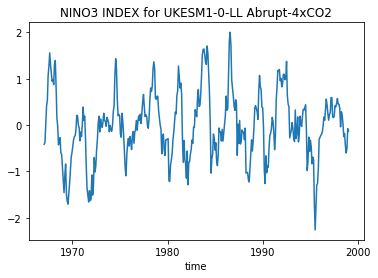

In [105]:
datetimeindex_4x = index_nino3_4x.indexes['time'].to_datetimeindex()
index_nino3['time'] = datetimeindex_4x

index_nino3_4x.plot()
plt.title(f"NINO3 INDEX for {model_name} Abrupt-4xCO2")
plt.savefig(f"{model_name}_4xCO2_Nino3Idx_{tm_1pct_st}_{tm_1pct_nd}.png")